<a href="https://colab.research.google.com/github/A1abhiral/Final-Portfolio-AI-/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis Statistical Interpretation and Visualizations.

🔹 First 5 Rows of Dataset:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Col

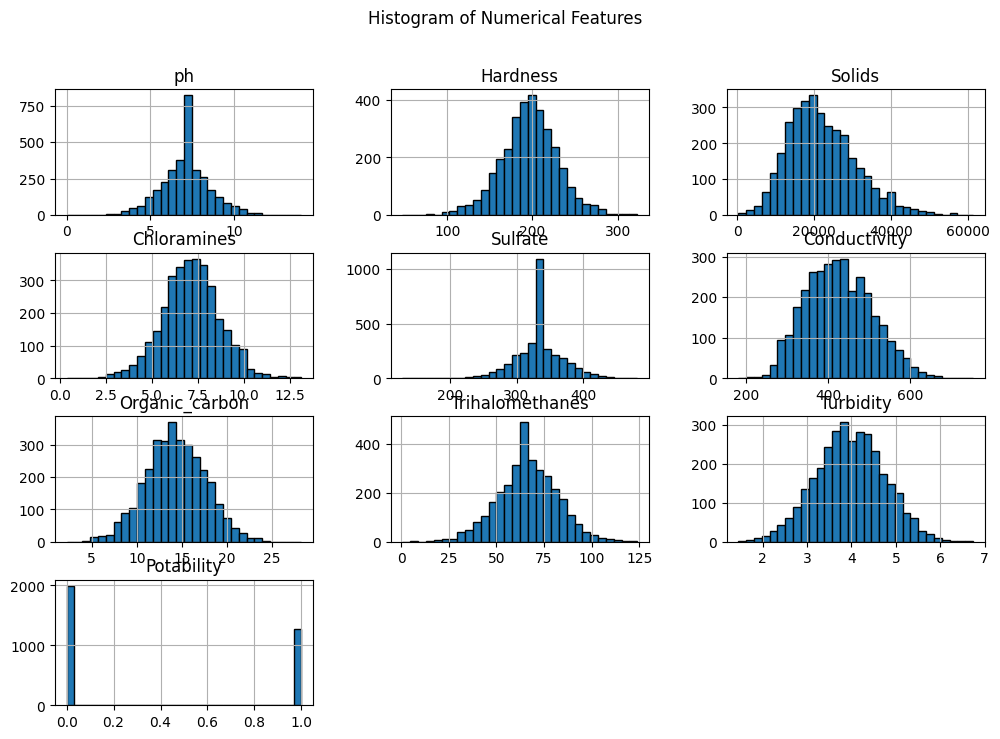

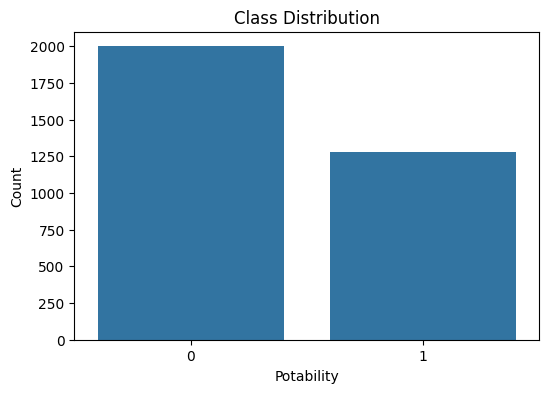

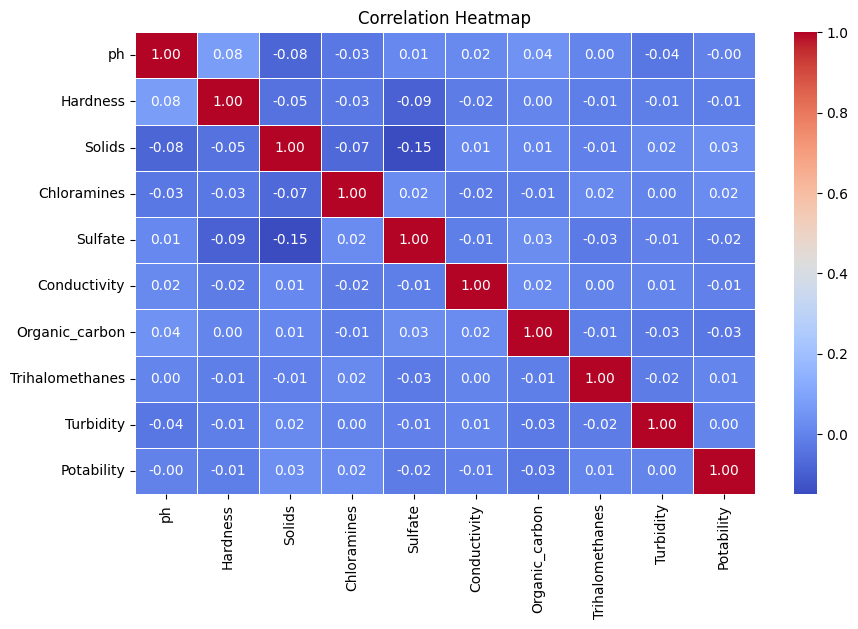

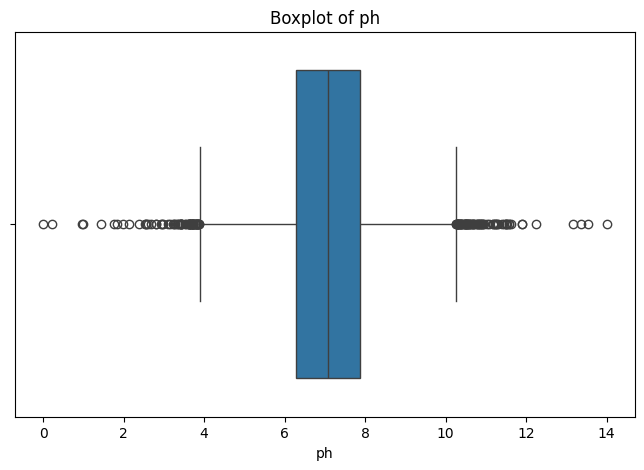


✅ Cleaned dataset saved as 'cleaned_data_classification.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

#  Upload and Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/water_potability (classification).csv")

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display first 5 rows
print("🔹 First 5 Rows of Dataset:")
print(df.head())

# Check Dataset Information
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Dataset Summary Statistics:")
print(df.describe())

#  Check for Missing Values
print("\n🔹 Missing Values Count:")
print(df.isnull().sum())

# Handle Missing Values

# Fill missing values in numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Fill missing values in categorical (0/1) columns with mode
df['Potability'] = df['Potability'].fillna(df['Potability'].mode()[0])

print("\n✅Missing values filled successfully!")

#  Step 6: Data Visualizations

# 🔹 Histogram for Numerical Features (Distribution)
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=12)
plt.show()

# 🔹 Count Plot for Target Variable (Potability)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Potability'])
plt.title("Class Distribution")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

# 🔹 Correlation Heatmap (For Numerical Features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 🔹 Boxplot (Detect Outliers for First Column)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df.iloc[:, 0])
plt.title(f"Boxplot of {df.columns[0]}")
plt.show()

# Step 7: Save Cleaned Data
df.to_csv("/content/drive/MyDrive/cleaned_data_classification.csv", index=False)

print("\n✅ Cleaned dataset saved as 'cleaned_data_classification.csv'")


Logistic Regression from scratch

Final Weights (m): [ 5.68317418e-03 -2.73421102e-02  6.77640123e-02  5.24660688e-02
 -3.42587355e-02 -1.66477778e-02 -6.04187359e-02  1.20360637e-02
  4.35458263e-05]
Final Bias (b): -0.448318244354985
Final Binary Cross-Entropy Loss: 0.6671812381590931


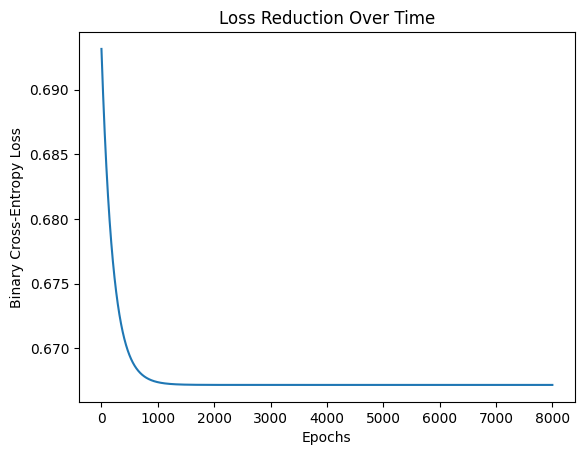

Training Accuracy: 0.6101953601953602
Predicted Probability for New Data: [[0.47499468]]
Predicted Class: 0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_classification.csv")

# Drop 'Date' column
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'Potability'
X = df.drop(columns=[target_column]).values  # Features (NumPy array)
y = df[target_column].values.reshape(-1, 1)  # Target variable (reshaped for computation)

# Step 2.1: Compute Mean and Standard Deviation for Normalization
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

# Normalize X
X = (X - X_mean) / X_std

# Step 3: Initialize Parameters
num_features = X.shape[1]  # Number of features
m = np.zeros((num_features, 1))  # Weights for features
b = 0
learning_rate = 0.01
epochs = 8000
n = len(y)

#  Step 4: Define Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#  Step 5: Implement Gradient Descent
losses = []  # Store loss for visualization

for epoch in range(epochs):
    linear_model = np.dot(X, m) + b  # Compute linear combination
    y_pred = sigmoid(linear_model)  # Apply sigmoid function
    error = y_pred - y  # Error (difference between predicted and actual values)
    cost = -(1/n) * np.sum(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))  # Binary cross-entropy

    # Compute Gradients
    m_gradient = (1/n) * np.dot(X.T, error)  # Gradient for weights
    b_gradient = (1/n) * np.sum(error)       # Gradient for bias

    # Update Weights and Bias
    m -= learning_rate * m_gradient  # Update weights
    b -= learning_rate * b_gradient  # Update bias

    losses.append(cost)  # Store loss

# Step 6: Display Final Weights and Bias
print("Final Weights (m):", m.flatten())
print("Final Bias (b):", b)
print("Final Binary Cross-Entropy Loss:", losses[-1])

# Step 7: Plot Loss Over Time
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Reduction Over Time")
plt.show()

# Step 8: Make Predictions on Training Data (for accuracy calculation)
y_pred_train = sigmoid(np.dot(X, m) + b)  # Get prediction probabilities
y_pred_class_train = (y_pred_train >= 0.5).astype(int)  # Convert probabilities to binary class (0 or 1)

# Step 9: Calculate Accuracy
accuracy = np.mean(y_pred_class_train == y)  # Calculate accuracy
print("Training Accuracy:", accuracy)

# step 10: Make Predictions on New Data
X_new = np.array([[3.5, 5.2, 8.1, 2.3, 6.0, 7.5, 4.2, 3.1, 5.8]])
X_new = (X_new - X_mean) / X_std  # Standardize new input
y_new_pred = sigmoid(np.dot(X_new, m) + b)  # Compute prediction

print("Predicted Probability for New Data:", y_new_pred)
print("Predicted Class:", 1 if y_new_pred >= 0.5 else 0)


Model 1-Logistic regression using scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load Dataset
df = pd.read_csv("/content/drive/MyDrive/final assignment(AI)/cleaned_data_classification.csv")

# Drop 'Date' column
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# Step 2: Prepare Features (X) and Target (y)
target_column = 'Potability'
X = df.drop(columns=[target_column]).values
y = df[target_column].values  # Target variable (reshaped for computation)

# Step 2.1: Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize features using StandardScaler

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Initialize Logistic Regression Model
model = LogisticRegression(solver='liblinear', max_iter=8000)

# Step 5: Fit the Model to the Training Data
model.fit(X_train, y_train)

# Step 6: Make Predictions on Training Data
y_pred_train = model.predict(X_train)

# Step 7: Calculate Training Accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy using Sklearn:", training_accuracy)

# Step 8: Calculate Binary Cross-Entropy (Log Loss) for Training Data
y_pred_prob_train = model.predict_proba(X_train)[:, 1]
train_log_loss = log_loss(y_train, y_pred_prob_train)
print("Training Log Loss:", train_log_loss)

# Step 9: Make Predictions on Test Data
y_pred_test = model.predict(X_test)

# Step 10: Calculate Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy using Sklearn:", test_accuracy)

# Step 11: Make Predictions on New Data
X_new = np.array([[3.5, 5.2, 8.1, 2.3, 6.0, 7.5, 4.2, 3.1, 5.8]])
X_new_scaled = scaler.transform(X_new)  # Standardize input

# Predicting the probability and class for new data
y_new_pred_prob = model.predict_proba(X_new_scaled)[:, 1]  # Predicted probability for class 1
y_new_pred_class = model.predict(X_new_scaled)  # Predicted class for new input

print("Predicted Probability for New Data:", y_new_pred_prob)
print("Predicted Class for New Data:", y_new_pred_class[0])



Training Accuracy using Sklearn: 0.6053435114503817
Training Log Loss: 0.6691907413711314
Test Accuracy using Sklearn: 0.6280487804878049
Predicted Probability for New Data: [0.4601714]
Predicted Class for New Data: 0


Model 2-Decision Tree using scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Model with regularization
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=10,  # Require a minimum number of samples to split a node
    min_samples_leaf=5,  # Require a minimum number of samples at a leaf node
    class_weight='balanced'  # Handle class imbalance by assigning weight to classes
)

# Fit the model
model.fit(X_train, y_train)

# Make predictions on training data
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy using Decision Tree:", train_accuracy)

# Log Loss for Training Data
y_pred_prob_train = model.predict_proba(X_train)[:, 1]
train_log_loss = log_loss(y_train, y_pred_prob_train)
print("Training Log Loss:", train_log_loss)

# Make predictions on test data
y_pred_test = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy using Decision Tree:", test_accuracy)

# Predicting on new data
X_new = np.array([[3.5, 5.2, 8.1, 2.3, 6.0, 7.5, 4.2, 3.1, 5.8]])
X_new_scaled = scaler.transform(X_new)

# Predicting class and probability for new data
y_new_pred_class = model.predict(X_new_scaled)
y_new_pred_prob = model.predict_proba(X_new_scaled)[:, 1]

print("Predicted Probability for New Data:", y_new_pred_prob)
print("Predicted Class for New Data:", y_new_pred_class[0])


Training Accuracy using Decision Tree: 0.6629770992366413
Training Log Loss: 0.6356735453130438
Test Accuracy using Decision Tree: 0.6417682926829268
Predicted Probability for New Data: [0.17973708]
Predicted Class for New Data: 0


Decision tree has higher test accuracy therefore decision tree model performed better


Hyper-parameter Optimizations with Cross Validations for both the Models.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Hyperparameter Tuning for Logistic Regression
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

log_reg_model = LogisticRegression(random_state=42)

log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid_search.fit(X_train_scaled, y_train)

# Best parameters for Logistic Regression
best_log_reg_params = log_reg_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_log_reg_params)

#  Step 2: Hyperparameter Tuning for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', None]
}

dt_model = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)

# Best parameters for Decision Tree
best_dt_params = dt_grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_dt_params)

# Step 3: Results
print(f"Best Logistic Regression Parameters: {best_log_reg_params}")
print(f"Best Decision Tree Parameters: {best_dt_params}")


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters for Decision Tree: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Decision Tree Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


Feature Selection to determine the subset of best features for both the Models.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Step 1: Feature Selection for Logistic Regression using Recursive Feature Elimination (RFE)
log_reg_model = LogisticRegression(random_state=42)
rfe = RFE(log_reg_model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X_train_scaled, y_train)

# Print the selected features for Logistic Regression
log_reg_selected_features = [col for col, support in zip(df.drop(columns=[target_column]).columns, rfe.support_) if support]
print("Best Features for Logistic Regression using RFE:", log_reg_selected_features)

# Step 2: Feature Selection for Decision Tree using Feature Importance
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Get feature importances for Decision Tree
dt_feature_importances = dt_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': df.drop(columns=[target_column]).columns,
    'Importance': dt_feature_importances
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 important features for Decision Tree
top_dt_features = importance_df['Feature'].head(5).tolist()
print("Best Features for Decision Tree based on Feature Importance:", top_dt_features)


Best Features for Logistic Regression using RFE: ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon']
Best Features for Decision Tree based on Feature Importance: ['Sulfate', 'ph', 'Chloramines', 'Hardness', 'Solids']


Final Model:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

best_model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=42)

# Select the best subset of features (from feature selection step)
best_features_dt = ['Sulfate', 'ph', 'Chloramines', 'Hardness', 'Solids']

# Prepare data with selected features
X_selected_dt = df[best_features_dt].values
y_selected = df[target_column].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_dt, y_selected, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the best model using the best hyperparameters and best features
best_model.fit(X_train_scaled, y_train)

# Make predictions on test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict the class for new data
X_new = np.array([[3.5, 4.2, 8.1, 2.3, 2.3]])
X_new_scaled = scaler.transform(X_new)  # Standardize the new input

# Predict class for new data
y_new_pred = best_model.predict(X_new_scaled)
y_new_pred_prob = best_model.predict_proba(X_new_scaled)[:, 1]  # Predict probability for class 1

print("Predicted Class for New Data:", y_new_pred[0])
print("Predicted Probability for New Data (class 1):", y_new_pred_prob[0])


Final Model Accuracy: 0.6417682926829268
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       412
           1       0.53      0.29      0.37       244

    accuracy                           0.64       656
   macro avg       0.60      0.57      0.56       656
weighted avg       0.62      0.64      0.61       656

Predicted Class for New Data: 0
Predicted Probability for New Data (class 1): 0.0


Since the Final Model Accuracy is greater than before, we can say that the performance of the model has improved.